<a href="https://colab.research.google.com/github/Eshatelkar/Task2_Codefamily/blob/main/Esha_Telkarstudent_permformace_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


Students performance in exams

Marks secured by the students in college

Aim

To understand the influence of various factors like economic,personal and social on the students perfomance

Inferences would be:

1.How to improve the students perfomance in each test?

2.What are the major influencing the test scores?

3.Effectiveness of test preparation course?

4.Other inferences

Import the required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_theme()
sns.set(rc={'figure.figsize':(6,3)})

Let us initialize the required values(we will use them later in the program)
we will set the minimum marks to 40 to pass in a exam

In [ ]:
passmark = 40

Let us read the data from the csv file

In [ ]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
df.rename(columns={'ParentalLevelOfEducation':'parental level of education','TestPreparationCourse':'test preparation course','MathScore':'math score',
                    'ReadingScore':'reading score','WritingScore':'writing score'},inplace=True)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
categorical = [var for var in df.columns if df[var].dtype=='0']

print('The categorical variables are: ',categorical)

The categorical variables are:  []


In [ ]:
numerical = [var for var in df.columns if df[var].dtype!='0']

print('The numerical variables are: ',numerical)

The numerical variables are:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


We will print top few rows to understand about the various data columns

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Size of data frame

In [ ]:
print(df.shape)

(1000, 8)


Let us understand about the basic information of the data like min,max,mean and standard deviation etc.

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Let us check for any missing values

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

As seen above ,these are no missing(null)values in this dataframe but in real scenarios we need work on dataset with a lot of missing values

Let us explore the Math Score first

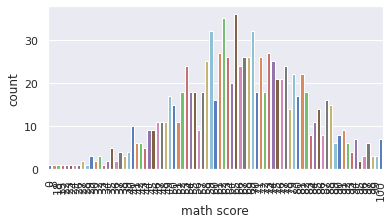

In [ ]:
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

How many students passed in Math exam?

In [ ]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

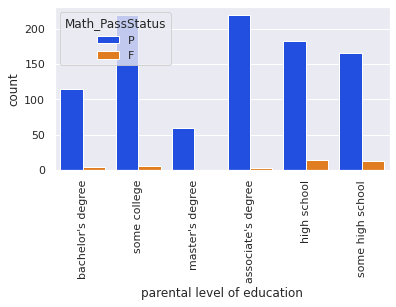

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Let us explore the Reading score

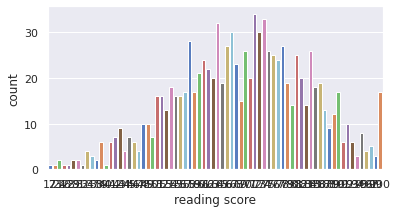

In [ ]:
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

How many students passed in reading?

In [ ]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

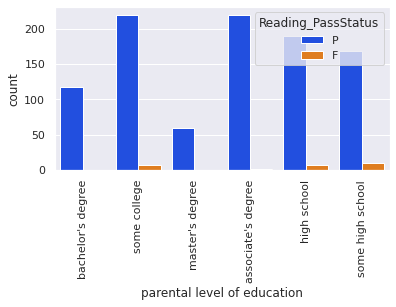

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Let us explore writing score

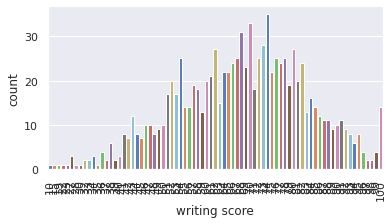

In [ ]:
p = sns.countplot(x="writing score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

How many students passed writing?

In [ ]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

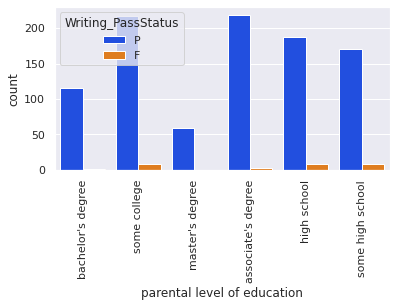

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Let us check"How many students passed in all subjects"?

In [ ]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

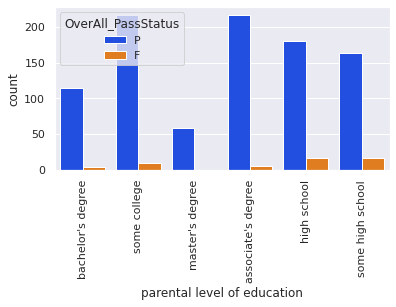

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

Find the percentage of marks

In [ ]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

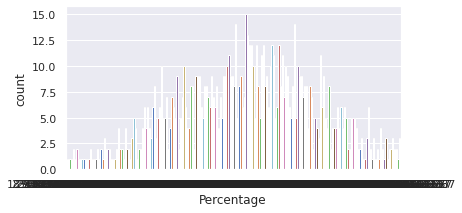

In [ ]:
p = sns.countplot(x="Percentage", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=0) 

Let us assign the grades
Grading
above 80 = A Grade
70 to 80 = B Grade
60 to 70 = C Grade
50 to 60 = D Grade
40 to 50 = E Grade
below 40 = F Grade ( means Fail )

In [ ]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

we will plot the grades obtained in a order

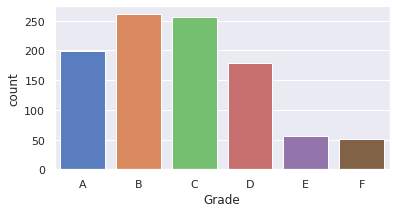

In [ ]:
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

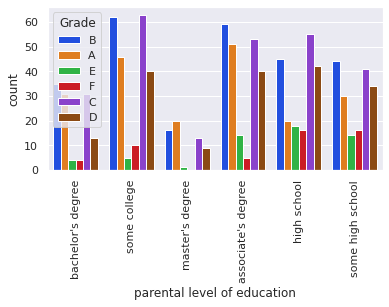

In [ ]:
p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

In [ ]:
B = df.groupby('parental level of education')
B

In [ ]:
for ParentalLevelOfEducation,df in B:
    print('level of education of parental:',ParentalLevelOfEducation)
    print('-------------------------------------------------------')
    print('df:',df)

level of education of parental: associate's degree
-------------------------------------------------------
df:      gender race/ethnicity parental level of education         lunch  \
3      male        group A          associate's degree  free/reduced   
5    female        group B          associate's degree      standard   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
19   female        group C          associate's degree  free/reduced   
..      ...            ...                         ...           ...   
968  female        group E          associate's degree      standard   
977    male        group C          associate's degree      standard   
979  female        group C          associate's degree      standard   
986  female        group C          associate's degree      standard   
992  female        group D          associate's degree  free/reduced   

    test preparation cou

In [ ]:
B1 = df.groupby('parental level of education')[['Percentage']].mean().reset_index()
B1

,parental level of education,Percentage
0,some high school,65.108007


In [ ]:
B1 = df.groupby('parental level of education')[['Total_Marks']].mean().reset_index()
B1

,parental level of education,Total_Marks
0,some high school,195.324022


So the parental level of education at some high school have a high percentage and high total marks we select this to analysis to create dataframe

In [ ]:
x=B.get_group('some high school')
x

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
15,female,group C,some high school,standard,none,69,75,78,P,P,P,P,222,74.000000,B
17,female,group B,some high school,free/reduced,none,18,32,28,F,F,F,F,78,26.000000,F
23,female,group C,some high school,standard,none,69,73,73,P,P,P,P,215,71.666667,B
37,female,group D,some high school,free/reduced,none,50,64,59,P,P,P,P,173,57.666667,D
54,female,group C,some high school,free/reduced,completed,71,84,87,P,P,P,P,242,80.666667,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,male,group B,some high school,standard,completed,79,85,86,P,P,P,P,250,83.333333,A
984,female,group C,some high school,standard,none,74,75,82,P,P,P,P,231,77.000000,B
987,male,group E,some high school,standard,completed,81,75,76,P,P,P,P,232,77.333333,B
988,female,group A,some high school,free/reduced,none,44,45,45,P,P,P,P,134,44.666667,E


In [ ]:
some_high_school=pd.DataFrame(x)

In [ ]:
some_high_school.describe()

,math score,reading score,writing score,Total_Marks,Percentage
count,179.000000,179.000000,179.000000,179.000000,179.000000
mean,63.497207,66.938547,64.888268,195.324022,65.108007
std,15.927989,15.479295,15.736197,44.952235,14.984078
min,0.000000,17.000000,10.000000,27.000000,9.000000
25%,53.000000,56.500000,54.000000,167.000000,55.666667
50%,65.000000,67.000000,66.000000,200.000000,66.666667
75%,74.000000,79.000000,77.000000,229.500000,76.500000
max,97.000000,100.000000,100.000000,297.000000,99.000000


Analysis some_high_school

In [ ]:
race_type=some_high_school.groupby('race/ethnicity')[['Percentage']].mean().reset_index()
race_type

,race/ethnicity,Percentage
0,group A,59.861111
1,group B,64.289474
2,group C,63.156463
3,group D,68.613333
4,group E,69.407407


<AxesSubplot:>

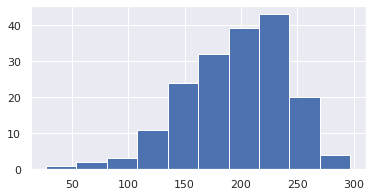

In [ ]:
# Histograms
df['Total_Marks'].hist()

<AxesSubplot:>

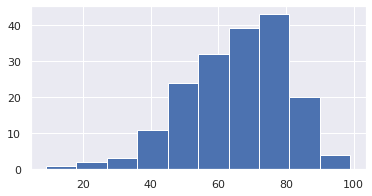

In [ ]:
df['Percentage'].hist()

<AxesSubplot:>

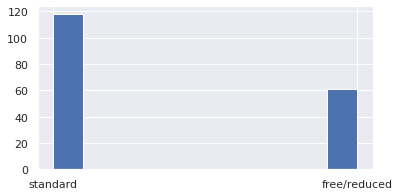

In [ ]:
df['lunch'].hist()

<AxesSubplot:>

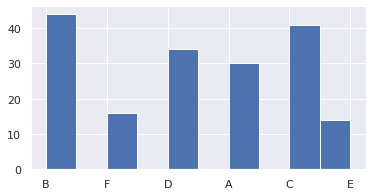

In [ ]:
df['Grade'].hist()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['parental level of education']= le.fit_transform(df['parental level of education'])

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Total_Marks,Percentage,Grade
15,female,group C,0,standard,none,69,75,78,P,P,P,P,222,74.000000,B
17,female,group B,0,free/reduced,none,18,32,28,F,F,F,F,78,26.000000,F
23,female,group C,0,standard,none,69,73,73,P,P,P,P,215,71.666667,B
37,female,group D,0,free/reduced,none,50,64,59,P,P,P,P,173,57.666667,D
54,female,group C,0,free/reduced,completed,71,84,87,P,P,P,P,242,80.666667,A
